In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, rankdata
import matplotlib
import os

In [2]:
data = pd.read_csv("../Baselines/ranks_features_2015.csv")
data.head()

,id,questionage,label,decision_time,topic_reputation_user,topic_reputation_asker,num_words,num_hyperlinks,GunningFogIndex,LIX,...,number_posts_asker,num_questions_asker,number_answers_asker,accepted_answers_asker,question_reputation_asker,answer_reputation_asker,num_solved_questions_asker,reputation_asker,topic_affinity_user,rank
0,144354,0.348912,1,3035100,0,0,110,0,53.769369,141.630631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,24.0
1,144439,0.001620,0,3035100,0,0,86,1,19.057678,49.891386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,7.0
2,146431,0.006771,0,3035100,0,0,304,0,7.627530,32.530364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,8.0
3,144433,0.011655,0,3035100,0,0,75,0,19.647257,59.244726,...,76.0,6.0,70.0,30.0,23.0,228.0,2.0,6555.0,0.000096,4.0
4,144424,0.042951,0,3035100,0,0,134,0,9.936790,33.483951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,2.0


### Sanity check

In [3]:
diff_ranks = []
for group in np.unique(data["decision_time"].values):
    subset = data[data["decision_time"]==group]
    # print(len(subset))
    # print(len(np.unique(subset["rank"])), len(subset))
    diff_ranks.append(len(np.unique(subset["rank"])))
print("average of how many different ranks per group:", np.mean(diff_ranks))

average of how many different ranks per group: 93.12596401028277


### Feature importance (copied from output when training and testing RF):

['topic_reputation_asker' 'num_hyperlinks' 'accepted_answers_asker'
 'num_solved_questions_user' 'number_answers_asker'
 'answer_reputation_asker' 'num_questions_user' 'question_reputation_user'
 'num_questions_asker' 'number_posts_asker' 'accepted_answers_user'
 'number_answers_user' 'number_posts_user' 'num_solved_questions_asker'
 'answer_reputation_user' 'question_reputation_asker'
 'topic_reputation_user' 'topic_affinity_user' 'num_words'
 'GunningFogIndex' 'cumulative_term_entropy' 'LIX' 'questionage']
 
 --> sorted by importance (questionage most important)

### compare label=1 data to label=0 data

In [5]:
data_neg = data[data["label"]==0]
data_gt = data[data["label"]==1]

In [6]:
print("comparison of ranks")
print("label=0: ", np.mean(data_neg["rank"].values))
print("label=1: ", np.mean(data_gt["rank"].values))

comparison of ranks
label=0:  51.304627580171925
label=1:  18.768637532133678


In [7]:
# print("topic_affinity_asker")
#print(np.mean(data_neg["topic_affinity_asker"].values))
#print(np.mean(data_gt["topic_affinity_asker"].values))

print("topic_affinity_user")
print("label=0: ", np.mean(data_neg["topic_affinity_user"].values))
print("label=1: ", np.mean(data_gt["topic_affinity_user"].values))

topic_affinity_user
label=0:  0.016316644487467113
label=1:  0.02962331032860369


# Analyze the ground truth questions

In [68]:
data_gt = data[data["label"]==1]

### Which features correlate with the rank?

I.e. can we say the higher the rank (=the less accurate the prediction), the higher questionage for example?

In [8]:
corrs = []
cols = np.asarray(data.columns[:-1])
for col in data.columns[:-1]:
    r, _ = pearsonr(data[col], data["rank"])
    # print(col, data_gt[col].values.tolist())
    corrs.append(r)
sorted_corrs = np.flip(np.argsort(np.abs(corrs)))
sorted_cols = cols[sorted_corrs]
sorted_corrs = np.asarray(corrs)[sorted_corrs]
for i in range(len(sorted_corrs)):
    print(sorted_cols[i], sorted_corrs[i])

questionage 0.14702390964975545
num_solved_questions_asker -0.14213606142550003
num_questions_asker -0.13987235768005107
question_reputation_asker -0.12873526940881283
label -0.11059379871410217
number_posts_asker -0.08484951492980648
reputation_asker -0.08349166812773146
topic_affinity_user -0.07094509984451665
topic_reputation_asker -0.06610302991897443
GunningFogIndex 0.06487867298337294
LIX 0.06432952055043893
number_answers_asker -0.06039716394555523
answer_reputation_asker -0.05747531094788287
accepted_answers_asker -0.053004169891619886
num_hyperlinks -0.04672408940095883
topic_reputation_user -0.03618122203373425
cumulative_term_entropy 0.028275601812327602
num_words -0.022273218330200906
id -0.0020253142156880367
number_posts_user 0.000920055478251231
number_answers_user 0.0008756101526189667
reputation_user 0.0008603131544710756
answer_reputation_user 0.0008498000663352356
accepted_answers_user 0.0008095369193718566
num_questions_user 0.0007213369535871974
num_solved_question

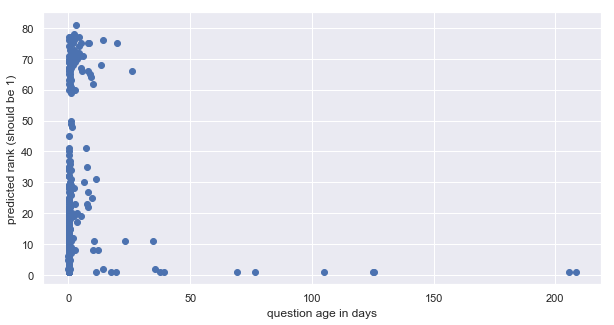

In [70]:
plt.figure(figsize=(10,5))
plt.scatter(data_gt["questionage"], data_gt["rank"])
plt.xlabel("question age in days")
plt.ylabel("predicted rank (should be 1)")
plt.show()

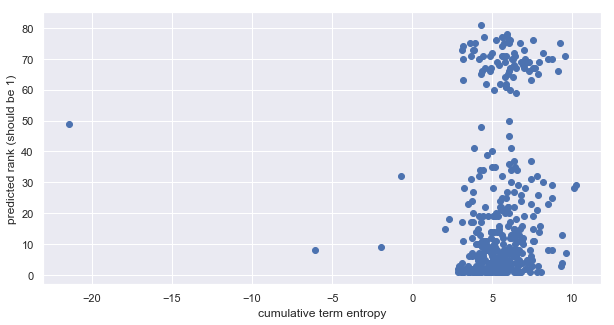

In [62]:
plt.figure(figsize=(10,5))
plt.scatter(data_gt["cumulative_term_entropy"], data_gt["rank"])
plt.xlabel("cumulative term entropy")
plt.ylabel("predicted rank (should be 1)")
plt.show()

### How to the well-predicted examples differ from the ones where prediction did not work?

In [9]:
data_good = data_gt[data_gt["rank"]>10]
data_bad = data_gt[data_gt["rank"]<=10]

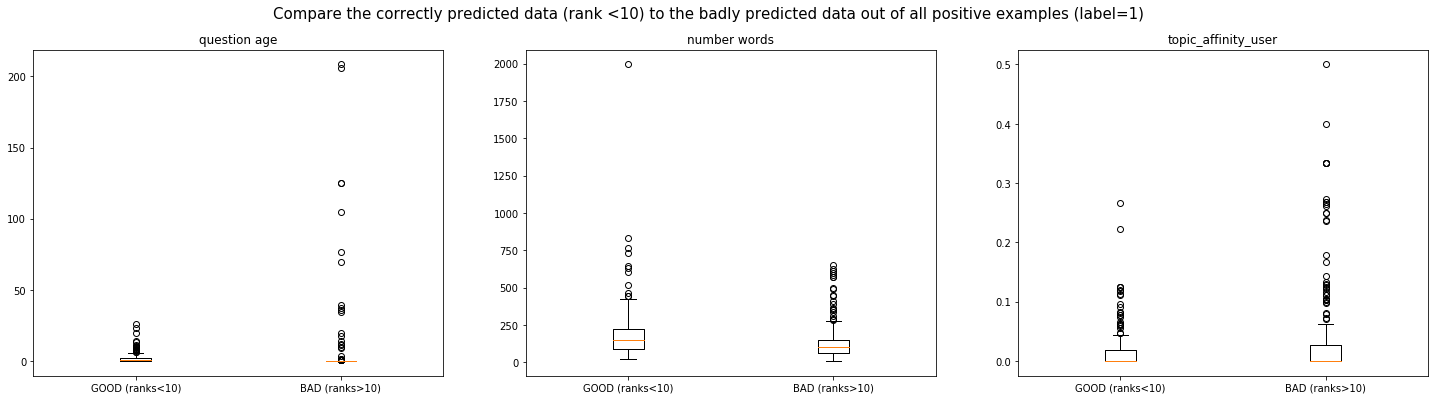

In [10]:
num_plots = 3
plt.figure(figsize=(25,6))
plt.subplot(1,num_plots,1)
plt.boxplot([data_good["questionage"], data_bad["questionage"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
plt.title("question age")
plt.subplot(1,num_plots,2)
plt.boxplot([data_good["num_words"], data_bad["num_words"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
plt.title("number words")
plt.subplot(1,num_plots,3)
plt.boxplot([data_good["topic_affinity_user"], data_bad["topic_affinity_user"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
# plt.ylim(0,3000)
plt.title("topic_affinity_user")
plt.suptitle("Compare the correctly predicted data (rank <10) to the badly predicted data out of all positive examples (label=1)", fontsize=15)
plt.savefig("gt_data_boxplots_correctVSwronlyPredicted")
plt.show()

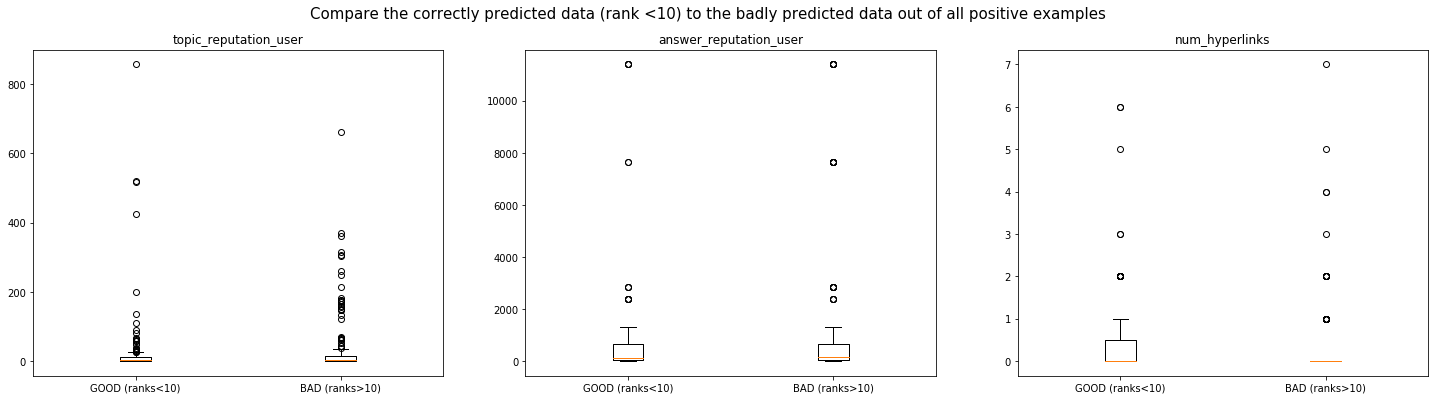

In [12]:
num_plots = 3
plt.figure(figsize=(25,6))
plt.subplot(1,num_plots,1)
plt.boxplot([data_good["topic_reputation_user"], data_bad["topic_reputation_user"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
plt.title("topic_reputation_user")
plt.subplot(1,num_plots,2)
plt.boxplot([data_good["answer_reputation_user"], data_bad["answer_reputation_user"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
plt.title("answer_reputation_user")
plt.subplot(1,num_plots,3)
plt.boxplot([data_good["num_hyperlinks"], data_bad["num_hyperlinks"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
# plt.ylim(0,3000)
plt.title("num_hyperlinks")
plt.suptitle("Compare the correctly predicted data (rank <10) to the badly predicted data out of all positive examples", fontsize=15)
plt.show()

In [14]:
for col in data_gt.columns:
    print(col, np.mean(data_good[col])/np.mean(data_bad[col]))

id 1.0061015058380531
questionage 0.4468786503758033
label 1.0
decision_time 1.0882333612896662
topic_reputation_user 0.8790833725886207
topic_reputation_asker 1.092690371573804
num_words 1.4300041249447406
num_hyperlinks 1.6531895777178798
GunningFogIndex 1.1328358922005077
LIX 1.1180706670347427
cumulative_term_entropy 1.084862040483922
number_posts_user 0.9288420663524627
num_questions_user 0.9166289942658641
number_answers_user 0.9517309113189526
accepted_answers_user 0.9152583550996524
question_reputation_user 0.9367437942103505
answer_reputation_user 0.8774757810914993
num_solved_questions_user 0.8399269628727937
reputation_user 0.8688749920846583
number_posts_asker 0.35293117427376425
num_questions_asker 0.5377845614262982
number_answers_asker 0.24109014675052412
accepted_answers_asker 0.2656911821332306
question_reputation_asker 0.6629554879856954
answer_reputation_asker 0.3818885927526192
num_solved_questions_asker 0.5554124541181016
reputation_asker 0.6604782605743231
topic_a

# Analyze the questions that were ranked high

Not necessarily the ground truth - what do questions have in common for which the random forest outputs a high rank?

In [15]:
high_preds = data[data["rank"]<10]
low_preds = data[data["rank"]>=10]

In [16]:
for col in data_gt.columns:
    print(col, np.mean(high_preds[col])/np.mean(low_preds[col]))

id 1.0008346102850643
questionage 0.597333514088812
label 13.609759861719859
decision_time 1.0018148086424927
topic_reputation_user 1.4580220237743913
topic_reputation_asker 4.772438920431882
num_words 1.0101564067097344
num_hyperlinks 1.0669606593510348
GunningFogIndex 0.9782792661143015
LIX 0.9820310544268579
cumulative_term_entropy 0.95589808766134
number_posts_user 0.9924837579990592
num_questions_user 0.9996990520514832
number_answers_user 0.9924317253193876
accepted_answers_user 0.9920662548521586
question_reputation_user 0.9980966793935958
answer_reputation_user 0.9906252864169948
num_solved_questions_user 0.9998937876292406
reputation_user 0.9916615344760864
number_posts_asker 2.7667426284619547
num_questions_asker 1.6825645198006942
number_answers_asker 3.6096082547829913
accepted_answers_asker 4.3128212094341905
question_reputation_asker 1.87413669887118
answer_reputation_asker 4.224151032738233
num_solved_questions_asker 1.797250696486277
reputation_asker 3.2396667969042245


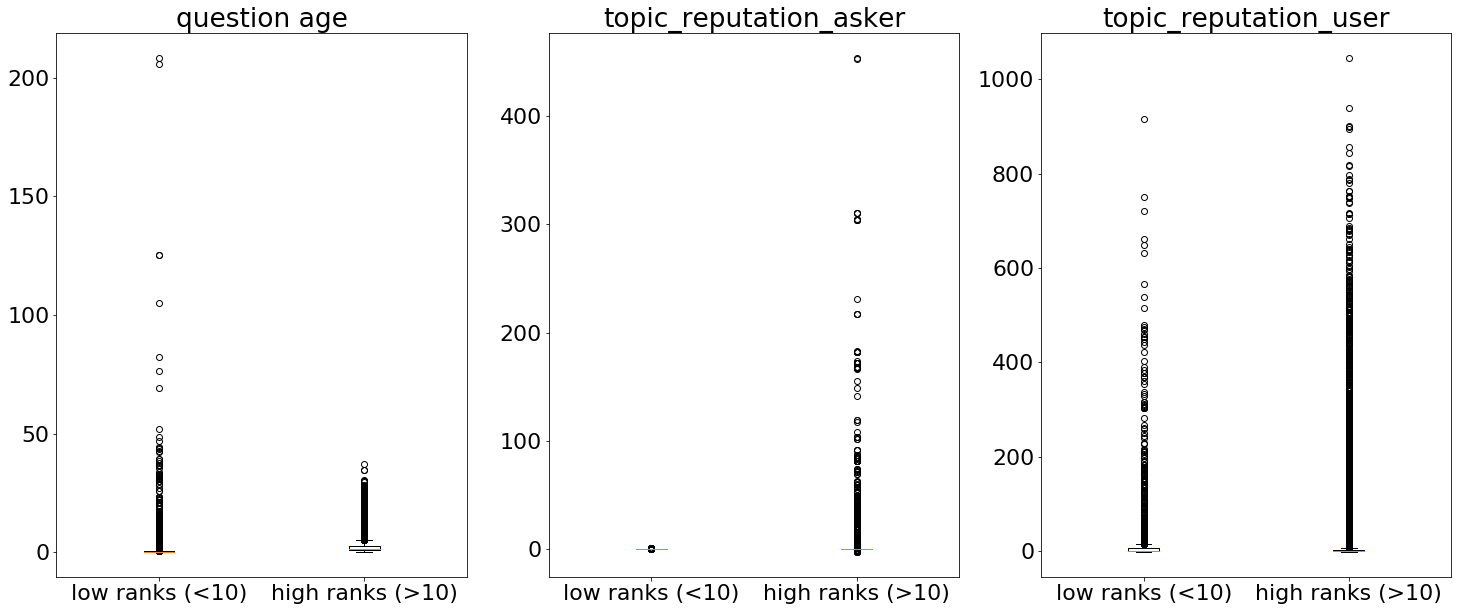

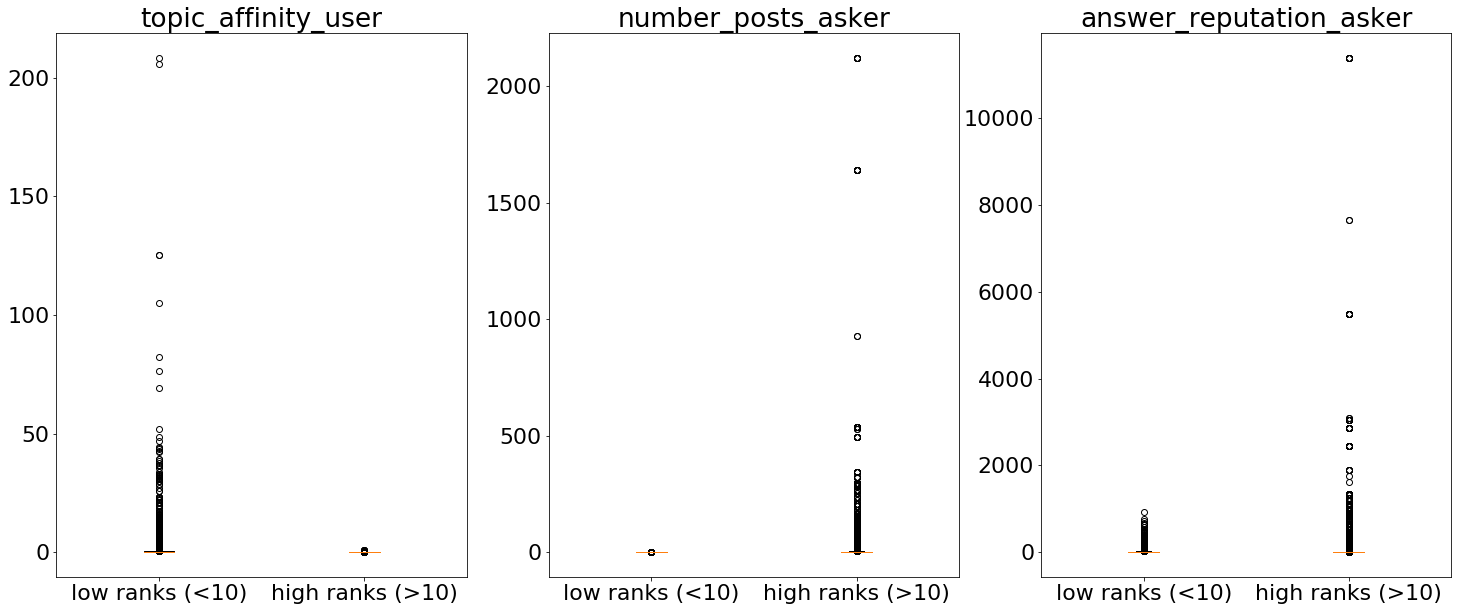

In [17]:
plt.rcParams.update({'font.size': 22})
num_plots = 3
plt.figure(figsize=(25,10))
plt.subplot(1,num_plots,1)
plt.boxplot([high_preds["questionage"], low_preds["questionage"]])
plt.xticks([1, 2], ['low ranks (<10)', 'high ranks (>10)'])
plt.title("question age")
plt.subplot(1,num_plots,2)
plt.boxplot([high_preds["topic_affinity_user"], low_preds["topic_reputation_asker"]])
plt.xticks([1, 2], ['low ranks (<10)', 'high ranks (>10)'])
plt.title("topic_reputation_asker")
plt.subplot(1,num_plots,3)
plt.boxplot([high_preds["topic_reputation_user"], low_preds["topic_reputation_user"]])
plt.xticks([1, 2], ['low ranks (<10)', 'high ranks (>10)'])
plt.title("topic_reputation_user")
plt.show()

plt.figure(figsize=(25,10))
plt.subplot(1,num_plots,1)
plt.boxplot([high_preds["questionage"], low_preds["topic_affinity_user"]])
plt.xticks([1, 2], ['low ranks (<10)', 'high ranks (>10)'])
plt.title("topic_affinity_user")
plt.subplot(1,num_plots,2)
plt.boxplot([high_preds["topic_affinity_user"], low_preds["number_posts_asker"]])
plt.xticks([1, 2], ['low ranks (<10)', 'high ranks (>10)'])
plt.title("number_posts_asker")
plt.subplot(1,num_plots,3)
plt.boxplot([high_preds["topic_reputation_user"], low_preds["answer_reputation_asker"]])
plt.xticks([1, 2], ['low ranks (<10)', 'high ranks (>10)'])
plt.title("answer_reputation_asker")
plt.show()

In [18]:
print("Comparison of ranks of compared data:")
print("all data, rank <10:", np.mean(high_preds["rank"]))
print("all data, rank >10:", np.mean(low_preds["rank"]))
print("")
print("Comparison of topic affinity (user:")
print("all data, rank <10:", np.mean(high_preds["topic_affinity_user"]))
print("all data, rank >10:", np.mean(low_preds["topic_affinity_user"]))
print("ground truth data (should have low ranks):", np.mean(data_gt["topic_affinity_user"]))
print("negative examples data (should have high ranks):", np.mean(data_neg["topic_affinity_user"]))
print("")
print("Comparison of topic reputation (user):")
print("all data, rank <10:", np.mean(high_preds["topic_reputation_user"]))
print("all data, rank >10:", np.mean(low_preds["topic_reputation_user"]))
print("ground truth data (should have low ranks):", np.mean(data_gt["topic_reputation_user"]))
print("negative examples data (should have high ranks):", np.mean(data_neg["topic_reputation_user"]))
print("")
print("Comparison of asker reputation (not used as feature itself):")
print("all data, rank <10:", np.mean(high_preds["reputation_asker"]))
print("all data, rank >10:", np.mean(low_preds["reputation_asker"]))
print("ground truth data (should have low ranks):", np.mean(data_gt["reputation_asker"]))
print("negative examples data (should have high ranks):", np.mean(data_neg["reputation_asker"]))
print("INTERPRETATION: the random forests selects questions from popular askers - why? It does not seem to be a feature that discriminates the ground truth from the negative data, because there the difference is not very significant.")
print("")

Comparison of ranks of compared data:
all data, rank <10: 4.993986254295533
all data, rank >10: 55.474028698497946

Comparison of topic affinity (user:
all data, rank <10: 0.023791507008280855
all data, rank >10: 0.015731320247292294
ground truth data (should have low ranks): 0.029623310328603682
negative examples data (should have high ranks): 0.016316644487466586

Comparison of topic reputation (user):
all data, rank <10: 14.631443298969073
all data, rank >10: 10.035131884422814
ground truth data (should have low ranks): 27.645244215938302
negative examples data (should have high ranks): 10.271915375508312

Comparison of asker reputation (not used as feature itself):
all data, rank <10: 1815.75372279496
all data, rank >10: 560.4754552320214
ground truth data (should have low ranks): 738.6940874035989
negative examples data (should have high ranks): 671.5091882431667
INTERPRETATION: the random forests selects questions from popular askers - why? It does not seem to be a feature that d

### Average value of number of appearances of one question

In [19]:
a, b = np.unique(data_neg["id"].values.tolist(), return_counts=True)
print(np.mean(b))

3.0447457095838883


### Aggregate the negative examples:

### - Compute the average rank per question (proposed to several users) 

### - Compare the ones that were recommended often to the ones that were not recommended often (high ranks)

In [20]:
agg = data.groupby(["id"]).agg({"rank":'mean', 'id':'count'})

In [154]:
agg

,rank,id
id,,
130866,21.000000,1
130908,60.000000,1
130911,60.000000,1
130912,64.500000,2
130926,60.000000,1
130931,60.000000,1
130933,33.000000,2
130937,64.000000,2
130939,22.666667,3


In [21]:
agg_low_rank = agg[agg["rank"]<10]
low_rank_ids = agg_low_rank.index.tolist()
agg_high_rank = agg[agg["rank"]>=10]
high_rank_ids = agg_high_rank.index.tolist()

In [22]:
low_rank_df = data[data["id"].isin(low_rank_ids)]
high_rank_df = data[data["id"].isin(high_rank_ids)]

In [23]:
print("number of low ranked ones (<10):", len(low_rank_ids))
print("number of high ranked ones (>10):", len(high_rank_ids))

number of low ranked ones (<10): 761
number of high ranked ones (>10): 12169


In [24]:
for col in low_rank_df.columns:
    print(col, np.mean(high_rank_df[col])/np.mean(low_rank_df[col]))

id 0.9749168959972324
questionage 2.76243555446481
label 0.053722910489196925
decision_time 1.0443730257144233
topic_reputation_user 0.5058126395668485
topic_reputation_asker 0.08022951061018359
num_words 1.019938264491106
num_hyperlinks 0.8370228089629926
GunningFogIndex 1.073868741549626
LIX 1.0635926522765555
cumulative_term_entropy 1.0579032533207806
number_posts_user 0.9039273572529111
num_questions_user 0.9395688891607453
number_answers_user 0.9014792712060783
accepted_answers_user 0.9077776560752432
question_reputation_user 0.9723658875279789
answer_reputation_user 0.8877137645079313
num_solved_questions_user 0.9311525191235441
reputation_user 0.9120164125799526
number_posts_asker 0.14509308054687933
num_questions_asker 0.54432902098307
number_answers_asker 0.09046207015745235
accepted_answers_asker 0.06742206270792366
question_reputation_asker 0.43598441666666266
answer_reputation_asker 0.07328709349349305
num_solved_questions_asker 0.47808600312693833
reputation_asker 0.119570

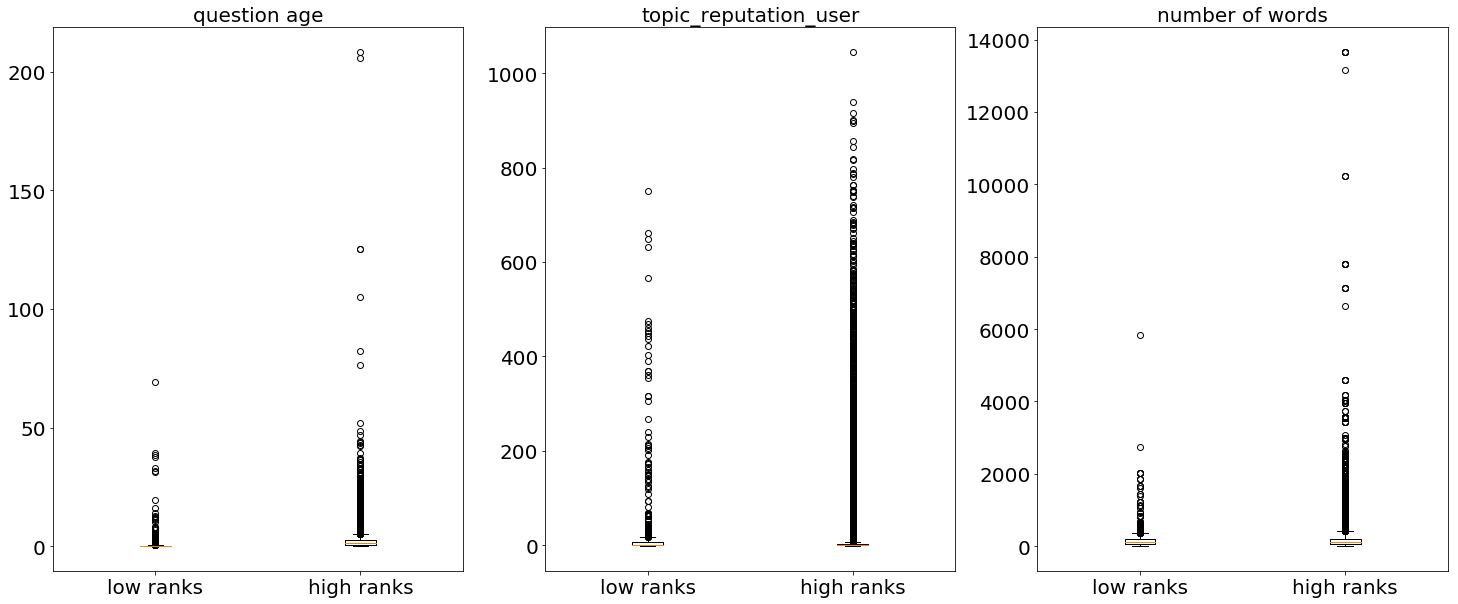

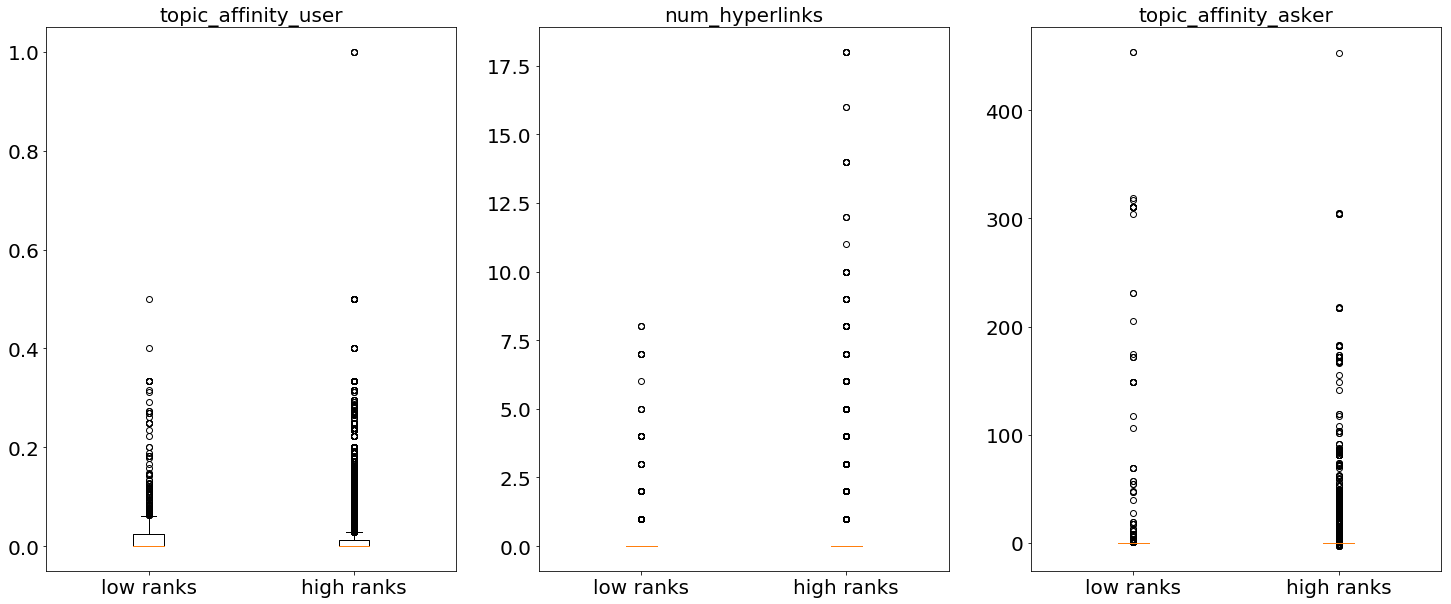

In [25]:
plt.rcParams.update({'font.size': 20})
num_plots = 3
plt.figure(figsize=(25,10))
plt.subplot(1,num_plots,1)
plt.boxplot([low_rank_df["questionage"], high_rank_df["questionage"]])
plt.xticks([1, 2], ['low ranks', 'high ranks'])
plt.title("question age", fontsize=20)
plt.subplot(1,num_plots,2)
plt.boxplot([low_rank_df["topic_reputation_user"], high_rank_df["topic_reputation_user"]])
plt.xticks([1, 2], ['low ranks', 'high ranks'])
plt.title("topic_reputation_user", fontsize=20)
plt.subplot(1,num_plots,3)
plt.boxplot([low_rank_df["num_words"], high_rank_df["num_words"]])
plt.xticks([1, 2], ['low ranks', 'high ranks'])
plt.title("number of words", fontsize=20)
plt.show()

num_plots = 3
plt.figure(figsize=(25,10))
plt.subplot(1,num_plots,1)
plt.boxplot([low_rank_df["topic_affinity_user"], high_rank_df["topic_affinity_user"]])
plt.xticks([1, 2], ['low ranks', 'high ranks'])
plt.title("topic_affinity_user", fontsize=20)
plt.subplot(1,num_plots,2)
plt.boxplot([low_rank_df["num_hyperlinks"], high_rank_df["num_hyperlinks"]])
plt.xticks([1, 2], ['low ranks', 'high ranks'])
plt.title("num_hyperlinks", fontsize=20)
plt.subplot(1,num_plots,3)
plt.boxplot([low_rank_df["topic_reputation_asker"], high_rank_df["topic_reputation_asker"]])
plt.xticks([1, 2], ['low ranks', 'high ranks'])
plt.title("topic_affinity_asker", fontsize=20)
plt.show()

In [27]:
print("Comparison of ranks of compared data:")
print("all data, rank <10:", np.mean(low_rank_df["rank"]))
print("all data, rank >10:", np.mean(high_rank_df["rank"]))
print("")
print("Comparison of topic affinity (user:")
print("all data, rank <10:", np.mean(low_rank_df["topic_affinity_user"]))
print("all data, rank >10:", np.mean(high_rank_df["topic_affinity_user"]))
print("ground truth data (should have low ranks):", np.mean(data_gt["topic_affinity_user"]))
print("negative examples data (should have high ranks):", np.mean(data_neg["topic_affinity_user"]))
print("")
print("Comparison of topic reputation (user):")
print("all data, rank <10:", np.mean(low_rank_df["topic_reputation_user"]))
print("all data, rank >10:", np.mean(high_rank_df["topic_reputation_user"]))
print("ground truth data (should have low ranks):", np.mean(data_gt["topic_reputation_user"]))
print("negative examples data (should have high ranks):", np.mean(data_neg["topic_reputation_user"]))
print("")
print("Comparison of asker reputation (not used as feature itself):")
print("all data, rank <10:", np.mean(low_rank_df["reputation_asker"]))
print("all data, rank >10:", np.mean(high_rank_df["reputation_asker"]))
print("ground truth data (should have low ranks):", np.mean(data_gt["reputation_asker"]))
print("negative examples data (should have high ranks):", np.mean(data_neg["reputation_asker"]))
print("INTERPRETATION: the random forests selects questions from popular askers - why? It does not seem to be a feature that discriminates the ground truth from the negative data, because there the difference is not very significant.")
print("")

Comparison of ranks of compared data:
all data, rank <10: 5.28714859437751
all data, rank >10: 52.172065782937224

Comparison of topic affinity (user:
all data, rank <10: 0.023679270828487305
all data, rank >10: 0.016260250971022093
ground truth data (should have low ranks): 0.029623310328603682
negative examples data (should have high ranks): 0.016316644487466586

Comparison of topic reputation (user):
all data, rank <10: 20.14859437751004
all data, rank >10: 10.191413705650117
ground truth data (should have low ranks): 27.645244215938302
negative examples data (should have high ranks): 10.271915375508312

Comparison of asker reputation (not used as feature itself):
all data, rank <10: 4736.423694779117
all data, rank >10: 566.3370198969853
ground truth data (should have low ranks): 738.6940874035989
negative examples data (should have high ranks): 671.5091882431667
INTERPRETATION: the random forests selects questions from popular askers - why? It does not seem to be a feature that di

### Explore other features of the questions which are not in train dataset but just in database

In [28]:
import psycopg2
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import expon

In [29]:
from sqlalchemy import create_engine

postgres_str = ('postgresql://localhost/crossvalidated')
cnx = create_engine(postgres_str)

In [30]:
often_recommended_questions = pd.read_sql_query('''SELECT * FROM Posts WHERE Id IN {};'''.format(tuple(low_rank_ids)), cnx)

In [31]:
often_recommended_questions.head()

,id,posttypeid,acceptedanswerid,parentid,creationdate,score,viewcount,body,owneruserid,lasteditoruserid,...,lasteditdate,lastactivitydate,title,tags,answercount,commentcount,favoritecount,closeddate,communityowneddate,jsonfield
0,131255,1,133385.0,None,2015-01-05 12:14:33.273,48,22034,"<p>This is a question in general, not specific...",29600,NaN,...,NaT,2017-11-28 02:45:38.693,Class imbalance in Supervised Machine Learning,<machine-learning><unbalanced-classes><supervi...,4,0,47.0,NaT,NaT,None
1,131281,1,131337.0,None,2015-01-05 15:34:09.797,39,34159,<p>What would be the approach to use Dynamic T...,54659,29949.0,...,2018-08-23 22:20:24.027,2019-03-25 13:18:40.437,Dynamic Time Warping Clustering,<time-series><clustering>,5,7,56.0,NaT,NaT,None
2,131285,1,131298.0,None,2015-01-05 16:05:29.553,7,1406,<p>i just finished developing an ARMAX model w...,64037,1352.0,...,2016-05-23 10:08:08.550,2016-05-23 10:08:08.550,Review of Box-Jenkins methodology,<time-series><python><arma><methodology><box-j...,1,6,4.0,NaT,NaT,None
3,131286,1,131306.0,None,2015-01-05 16:07:26.117,1,273,"<p>I have a dataset of around 30,000 people wh...",28550,NaN,...,NaT,2015-12-23 16:11:49.470,What software could fit an alternative specifi...,<random-effects-model><software><mlogit>,1,1,NaN,NaT,NaT,None
4,131360,1,132517.0,None,2015-01-06 01:55:24.823,-1,117,<p>What is the usefulness of Rosenthal inequal...,44677,44677.0,...,2015-01-07 01:26:05.270,2015-01-07 10:06:56.720,question about a Rosenthal inequality,<pdf><kernel-smoothing><nonparametric-density>,1,3,NaN,NaT,NaT,None


In [32]:
hardly_recommended_questions = pd.read_sql_query('''SELECT * FROM Posts WHERE Id IN {};'''.format(tuple(high_rank_ids)), cnx)

In [33]:
hardly_recommended_questions.head()

,id,posttypeid,acceptedanswerid,parentid,creationdate,score,viewcount,body,owneruserid,lasteditoruserid,...,lasteditdate,lastactivitydate,title,tags,answercount,commentcount,favoritecount,closeddate,communityowneddate,jsonfield
0,130866,1,NaN,None,2015-01-01 07:19:53.073,1,65,<p>The beautiful indie game Fez has numerous p...,64710,NaN,...,NaT,2015-01-01 07:19:53.073,Confidence in a rank ordering (Fez),<confidence-interval><ranking>,0,1,NaN,NaT,NaT,None
1,130908,1,NaN,None,2015-01-01 20:39:33.663,2,287,<p><strong>Just a quick clarification:</strong...,64734,NaN,...,NaT,2015-01-01 20:39:33.663,Which stats model to predict rank when partici...,<regression><repeated-measures><ranking>,0,3,NaN,NaT,NaT,None
2,130911,1,NaN,None,2015-01-01 21:23:09.430,0,1747,<p>How do you see pair-wise comparisons for ch...,64400,NaN,...,NaT,2015-01-01 21:23:09.430,Pair-wise comparisons for chi square test SPSS?,<spss><chi-squared>,0,4,NaN,NaT,NaT,None
3,130912,1,NaN,None,2015-01-01 21:26:09.987,3,177,<p>I am trying to derive the concentrated log-...,64735,64735.0,...,2015-01-02 16:03:28.327,2015-01-02 16:03:28.327,Deriving the log-likelihood with heteroskedast...,<regression><maximum-likelihood><instrumental-...,0,6,2.0,NaT,NaT,None
4,130926,1,NaN,None,2015-01-02 00:10:42.583,2,798,<p>You can do gibbs sampling from a deep belie...,64745,64745.0,...,2015-01-02 00:49:10.263,2016-01-27 08:15:50.450,Can you sample from an autoencoder?,<deep-learning>,2,2,NaN,NaT,NaT,None


### Compare features between often and hardly recommended questions

In [34]:
often_recommended_questions = often_recommended_questions.fillna(0)
hardly_recommended_questions = hardly_recommended_questions.fillna(0)
for c in list(often_recommended_questions.columns):
    try:
        print("  ")
        print(c, " - Mean of often  recommended questions: ", np.nanmean(often_recommended_questions[c].values))
        print(c, " - Mean of hardly recommended questions: ", np.nanmean(hardly_recommended_questions[c].values))
    except TypeError:
        pass
    except AttributeError:
        pass

  
id  - Mean of often  recommended questions:  160175.36662286465
id  - Mean of hardly recommended questions:  158878.45254334784
  
posttypeid  - Mean of often  recommended questions:  1.0
posttypeid  - Mean of hardly recommended questions:  1.0
  
acceptedanswerid  - Mean of often  recommended questions:  95901.51379763469
acceptedanswerid  - Mean of hardly recommended questions:  23537.769085380885
  
parentid  - Mean of often  recommended questions:  0.0
parentid  - Mean of hardly recommended questions:  0.0
  
  
score  - Mean of often  recommended questions:  3.4730617608409986
score  - Mean of hardly recommended questions:  2.4476949626099103
  
viewcount  - Mean of often  recommended questions:  2076.4283837056505
viewcount  - Mean of hardly recommended questions:  1282.0810255567426
  
  
owneruserid  - Mean of often  recommended questions:  55442.87385019711
owneruserid  - Mean of hardly recommended questions:  63170.1410140521
  
lasteditoruserid  - Mean of often  recommend

ValueError: Cannot add integral value to Timestamp without freq.

In [41]:
acceptedAnswer = often_recommended_questions["acceptedanswerid"].values
print("Ratio of nans for often_recommended_questions:", sum(acceptedAnswer==0)/len(acceptedAnswer))
acceptedAnswer = hardly_recommended_questions["acceptedanswerid"].values
print("Ratio of nans for hardly_recommended_questions:", sum(acceptedAnswer==0)/len(acceptedAnswer))

Ratio of nans for often_recommended_questions: 0.392904073587385
Ratio of nans for hardly_recommended_questions: 0.8638343331415893


In [37]:
print("Average score of often_recommended_questions:", np.mean(often_recommended_questions["score"].values))
print("Average score of hardly_recommended_questions:", np.mean(hardly_recommended_questions["score"].values))

Average score of often_recommended_questions: 3.4730617608409986
Average score of hardly_recommended_questions: 2.4476949626099103


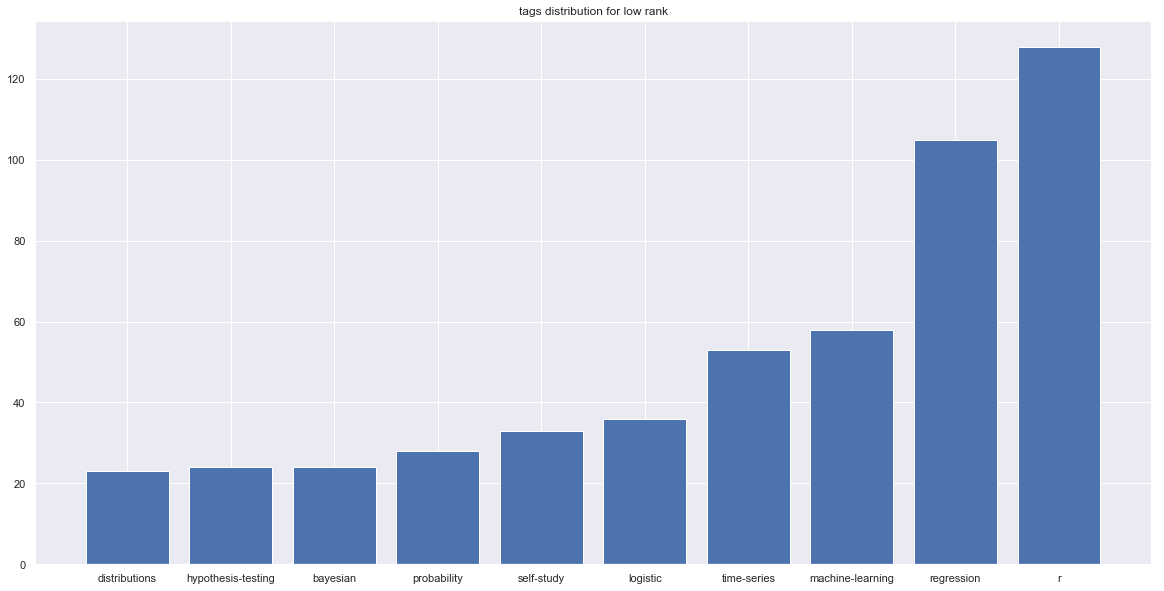

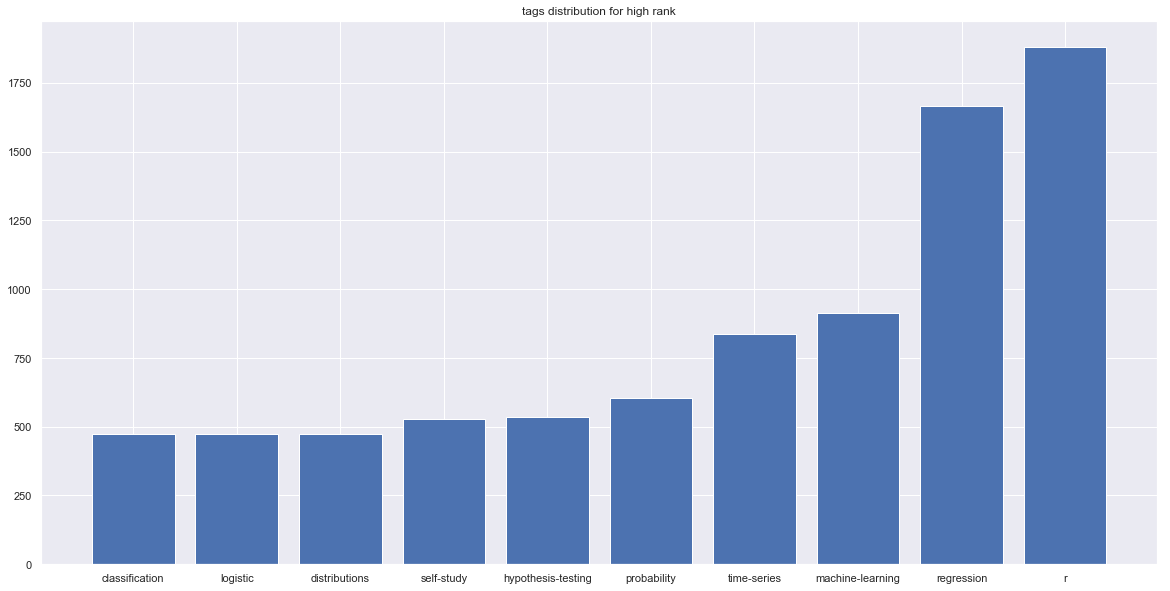

In [120]:
def to_tuple(df, col):
    return tuple(df[col].dropna().values.astype(int).tolist())

def clean_tags(tags):
    tags_clean = []
    for t in tags:
        new_list = t.split("><")
        new = [n.replace("<","").replace(">", "") for n in new_list]
        tags_clean.extend(new)
    return tags_clean

def get_tags(questions, cutoff=6):
    tags = questions["tags"].values
    tags_clean = clean_tags(tags)
    n, c = np.unique(tags_clean, return_counts=True)
    return n[c>=cutoff]

def get_most_tags(vals, num=10):
    tags = vals["tags"].values
    tags_clean = clean_tags(tags)
    uni, c = np.unique(tags_clean, return_counts=True)
    inds = np.argsort(c)
    most_often = uni[inds[-num:]]
    most_often_c = c[inds[-num:]]
    return most_often, most_often_c

def plot_tags(tags_often, counts, title):
    inds = np.arange(len(counts))
    plt.figure(figsize=(20,10))
    plt.bar(inds, counts)
    plt.xticks(inds, tags_often)
    plt.title(title)
    plt.show()

def compare_tags(vals_1, vals_2):
    tags_often, counts_often = get_most_tags(vals_1)
    plot_tags(tags_often, counts_often, "tags distribution for low rank")
    tags_hardly, counts_hardly = get_most_tags(vals_2)
    plot_tags(tags_hardly, counts_hardly, "tags distribution for high rank")
    
        
compare_tags(often_recommended_questions, hardly_recommended_questions )

In [121]:
tags_often = get_tags(often_recommended_questions, cutoff=3)
tags_hardly = get_tags(hardly_recommended_questions, cutoff = 10)
print("Tags that are in in often recommended questions but not in rest:")
for t in tags_often:
    if t not in tags_hardly:
        print(t)

Tags that are in in often recommended questions but not in rest:
filter
java


## Do the same for all negative data --> correlations

In [6]:
# Get the ids which are only in the negative examples, not in the positive
data_neg_ids = np.unique(data_neg["id"].values)
print(len(data_neg_ids))
data_gt_ids = np.unique(data_gt["id"].values)
print(len(data_gt_ids))
neg_not_gt = [i for i in data_neg_ids if not i in data_gt_ids]
print(len(neg_not_gt))

12761
384
12546


In [7]:
data_neg_filtered = data_neg[data_neg["id"].isin(neg_not_gt)]
data_neg_filtered = data_neg_filtered[["id", "rank"]]
data_neg_filtered = data_neg_filtered.groupby("id").agg({"rank":"mean"}).reset_index()

In [8]:
post_data = pd.read_sql_query(''' SELECT * FROM Posts WHERE Id IN {};'''.format(tuple(neg_not_gt)), cnx)

In [9]:
post_data_rank = pd.merge(post_data, data_neg_filtered, how="left")

In [10]:
print(len(post_data_rank))

12546


In [23]:
post_data_rank = post_data_rank.fillna(0)
for c in list(post_data_rank.columns):
    try:
        corr = pearsonr(post_data_rank[c].sample(n=1000, random_state=2), post_data_rank["rank"].sample(n=1000, random_state=2))
        print(c, ": ", corr[0])
    except TypeError:
        pass
    except AttributeError:
        pass
    except ValueError:
        pass

id :  0.031839421041599744
posttypeid :  nan
acceptedanswerid :  -0.2083671559168172
parentid :  nan
score :  -0.03717518426452321
viewcount :  0.0012135053972158825
owneruserid :  0.25643936314083315
lasteditoruserid :  -0.0031449754294247613
answercount :  -0.08540433528591045
commentcount :  -0.023378439182014255
favoritecount :  -0.05670596942488288
jsonfield :  nan
rank :  1.0


## Possible problem: many of the ground truth questions also appear in neg data

In [129]:
a = set(data_gt["id"].values)
b = set(data_neg["id"].values)
print(len(list(a)))
print(len(list(a.intersection(b))))

384
215


In [142]:
overlapping_ids = list(a.intersection(b))
neg_inter = data_neg[data_neg["id"].isin(overlapping_ids)]
pos_inter = data_gt[data_gt["id"].isin(overlapping_ids)]
print(len(neg_inter))
print(len(pos_inter)) # 217 because can happen that one question is ground truth two times

print("mean rank of negative examples in intersection", np.mean(neg_inter["rank"].values))
print("mean rank of positive examples in intersection", np.mean(pos_inter["rank"].values))
print("mean rank of negative examples in general", np.mean(data_neg["rank"].values))
print("mean rank of positive examples in general", np.mean(data_gt["rank"].values))

print("INTERPRETATION: Slightly worse performance of classifier on positive data from intersection, but similar")

602
217
mean rank of negative examples in intersection 51.34551495016611
mean rank of positive examples in intersection 26.63594470046083
mean rank of negative examples in general 51.47145725021877
mean rank of positive examples in general 22.447300771208226
INTERPRETATION: Slightly worse performance of classifier on positive data from intersection, but similar


### Filter the overlapping ones out to make sure that the accepted answer thing is not due to that

In [146]:
print(len(low_rank_ids))
low = [l for l in low_rank_ids if l not in overlapping_ids]
print(len(low))
print(len(high_rank_ids))
high = [l for l in high_rank_ids if l not in overlapping_ids]
print(len(high))
high_rank_ids = high
low_rank_ids = low

624
612
12137
11934


Exactly the same results --> appareantly the accepted answer issue is due to something else

## Search for reason why often recommended questions have higher probability of being answered

In [178]:
examples = pd.read_sql_query('''SELECT * FROM Posts LEFT JOIN (SELECT Id, Reputation FROM Users) b ON Posts.OwnerUserId=b.Id WHERE PostTypeId=1 AND Posts.Id>30000 AND Posts.ID<50000''', cnx)

In [179]:
acc = examples["acceptedanswerid"].values
print("number of examples", len(acc), "number of examples without accepted answer", sum(np.isnan(acc)))

without_acc = examples[pd.isnull(examples["acceptedanswerid"])]
with_acc = examples[examples["acceptedanswerid"].notnull()]

number of examples 6283 number of examples without accepted answer 3670


In [181]:
print(np.nanmean(without_acc["reputation"].values))
print(np.nanmean(with_acc["reputation"].values))

845.9553026096613
1551.6521739130435


### Interpretation: 
Maybe the model learns to predict if a question has an answer in the end or not. This seems to be correlated with asker reputation - with higher asker reputation it is more likely that the question will be answered.

But: this might be causality the other way round: maybe the reputation is just higher because their questions where upvoted and answered.

## Train model on the task to predict whether the question was answered or not

In [70]:
answered_questions = pd.read_sql_query('''SELECT Id, AcceptedAnswerId as label_acc FROM Posts ''', cnx)

In [71]:
answered_questions = answered_questions.fillna(0)
answered_questions["label_acc"] = (answered_questions["label_acc"]>0).astype(int)

In [72]:
answered_questions.head(20)

,id,label_acc
0,1,1
1,2,1
2,3,1
3,4,1
4,5,0
5,6,0
6,7,1
7,8,0
8,9,0
9,10,1


In [86]:
dataframes = []
path = "../Baselines/data/"
processed_already = [] # os.listdir("../Baselines/data_2015/")
for userfile in os.listdir(path):
    if userfile in processed_already or userfile[0]==".":
        continue
    example = pd.read_csv(path+userfile)
    example = example[['id', 'topic_reputation_asker', 'num_words', 'num_hyperlinks', 'GunningFogIndex', 'LIX', 'cumulative_term_entropy', 'number_posts_asker', 'num_questions_asker', 'number_answers_asker', 'accepted_answers_asker', 'question_reputation_asker', 'answer_reputation_asker', 'num_solved_questions_asker']]
    with_labels = pd.merge(example, answered_questions, how="left")
    dataframes.append(with_labels)
    
final = pd.concat(dataframes)
print(len(final))
final.drop_duplicates(subset="id", keep=False, inplace=True)
print(len(final))
final.head(20)
final.to_csv("data_acc_answer_TRAIN.csv", index=False)

192162
2668


In [75]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

In [82]:
df_train = pd.read_csv("data_acc_answer_TRAIN.csv")
df_test = pd.read_csv("data_acc_answer_TEST.csv")

In [84]:
X_train = df_train.drop(['label_acc', 'id'], axis=1)
features = X_train.columns.tolist()
X_train = np.asarray(X_train)
Y_train = df_train['label_acc'].values

# Prepare testing set
X_test = df_test.drop(['label_acc', 'id'], axis=1)
X_test = np.asarray(X_test)
Y_test = df_test['label_acc'].values
assert(len(X_train)==len(Y_train))

print("Size of training set: ", len(Y_train), " Test set:", len(Y_test))
class_counts = np.unique(Y_train, return_counts=True)[1]
print("Class imbalance: 1:", class_counts[0]/float(class_counts[1]))

# for depth in [20,40,80,120]:
#     for weight in [20,40]:
#         for n_estimators in [30,60,100]:
n_estimators=100
depth=50
weight=5
print("------------")
print("PARAMS:", depth, weight, n_estimators)
# Train RF
X_train, Y_train = shuffle(X_train, Y_train)
clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, class_weight={0:1, 1:weight})
clf.fit(X_train,Y_train)

# investigate features
sorted_importance = np.argsort(clf.feature_importances_)
print("Features sorted by their importance for prediction:")
print(np.asarray(features)[sorted_importance])

print("train score", clf.score(X_train, Y_train))

print("test score", clf.score(X_test, Y_test))
out = clf.predict(X_test)
print("balanced accuracy test", balanced_accuracy_score(Y_test, out))

Size of training set:  2668  Test set: 3206
Class imbalance: 1: 0.1836734693877551
------------
PARAMS: 50 5 100
Features sorted by their importance for prediction:
['topic_reputation_asker' 'num_hyperlinks' 'accepted_answers_asker'
 'num_questions_user' 'answer_reputation_asker' 'question_reputation_user'
 'number_answers_asker' 'topic_reputation_user'
 'num_solved_questions_user' 'label' 'accepted_answers_user'
 'topic_affinity_user' 'number_answers_user' 'number_posts_user'
 'answer_reputation_user' 'num_words' 'LIX' 'reputation_user'
 'num_questions_asker' 'GunningFogIndex' 'cumulative_term_entropy'
 'number_posts_asker' 'decision_time' 'question_reputation_asker'
 'num_solved_questions_asker' 'reputation_asker' 'questionage']
train score 1.0
test score 0.6600124766063631
balanced accuracy test 0.6647941573368957


# improve readibility scores etc

In [24]:
import re
import readability

In [27]:
question_bodies = pd.read_sql_query('''SELECT Id, body FROM Posts WHERE PostTypeId=1''', cnx)

In [25]:
def cumulative_term_entropy(text):
    """
    Computes cumulative term entropy of a question body as specified in
    section 3.3.2 in the paper
    """
    for bad_words in [".", "<", ">", "/", "\n", "?p", "'", "(", ")"]:
        text = text.replace(bad_words, "")
    text_list = text.lower().split(" ")
    word_list, word_count = np.unique(text_list, return_counts=True)
    num_words = len(word_list)
    cte = word_count * (np.log(num_words) - np.log(word_count))/num_words
    return sum(cte)

In [29]:
path = "../Baselines/data_2016_old_readability/"
path_out = "../Baselines/data_2016/"
processed_already = os.listdir(path_out)
for userfile in os.listdir(path):
    if userfile in processed_already or userfile[0]==".":
        continue
    example = pd.read_csv(path+userfile)
    question = pd.merge(example, question_bodies, how="left", on="id")
    question["body"] = question["body"].str.replace(re.compile(r'<.*?>'), '')
    question["body"] = question["body"].str.replace(re.compile(r'(\d[\.]?)+'), '#N')
    question["body"] = question["body"].str.replace(re.compile(r'\$.*?\$'), '#M')
    question["num_words"] = question["body"].str.count(' ') + 1
    readability_measures = question["body"].apply(lambda x: readability.getmeasures(x, lang='en')['readability grades'])
    question["GunningFogIndex"] = readability_measures.apply(lambda x: x['GunningFogIndex'])
    question["LIX"] = readability_measures.apply(lambda x: x['LIX'])
    question["cumulative_term_entropy"] = question["body"].apply(lambda x: cumulative_term_entropy(x))
    question = question.drop(["body"], axis=1)
    question.to_csv(path_out+userfile, index=False)

In [ ]:
reputation = pd.read_sql_query('''SELECT OwnerUserId, sum(upvotes) FROM Posts WHERE PostTypeId=1 GROUP BY OwnerUserId''', cnx)

In [ ]:
reputation = pd.read_sql_query('''SELECT * FROM , sum(upvotes) FROM Posts WHERE PostTypeId=1 GROUP BY OwnerUserId''', cnx)